In [250]:
# the kaggle notebook that was used:
# https://www.kaggle.com/code/zabihullah18/impact-of-covid-19

import numpy as np                   # supports mathmatical functions to operate on data structures
import pandas as pd                  # manipulation and analysis of structured data. can create tables but plt is more advanced
# the below are just advnaced graphing libraries
import matplotlib.pyplot as plt      # creates and visualises the data, plots
import seaborn as sns                # another data visualation. high level interface for graphs
import plotly.express as px          # interactive graphing. high level interface for visualizations
# using 'as' gives them alias so its shorter/easier to use

# jupyter notebook thing where the plots are directly produced below the code rather than in a new window (in incline)
%matplotlib inline     
sns.set_style('darkgrid')    # creates a dark grid with lines
plt.rcParams['font.size'] = 14 
plt.rcParams['figure.figsize'] = (17, 5)    #size of grid
plt.rcParams['figure.facecolor'] = '#00000000' #background colour is. # is start of hex code 000000 is the hex colour 00 is the opacity (transparent)
#runtime configuration parameters. it is the default setting for all graphs

In [252]:
# Load the COVID-19 dataset     reads the csv file and puts into a data fram
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', low_memory=False)

# came in to DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
# 1. can  specify the dtype  ('data.csv', dtype={32: 'float'}    does not work. 
# 2. can , low_memory=False 
#    pandas reads the file in chunks and tries to infer the data types for each column more accurately.

In [253]:
# Select relevant columns and puts into a new diff dataframe. double square brackets is needed for pd (panda)
rnr = df[['continent', 'location', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']]

In [254]:
# Group the new datafram by location and select maximum values for each metric(category)
dfe = rnr.groupby('location')[['continent', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].max()

In [255]:
# Reset index of the datafram for easier manipulation
sd = dfe.reset_index()
# not to sure but apparently it typically results in 
# the old index being converted into a column, and a new default integer index (starting from 0) being assigned to the DataFrame
#    A  B
# a  1  4
# b  2  5
# c  3  6
#   becomes:
#        index  A  B
#      0     a  1  4
#      1     b  2  5
#      2     c  3  6
# I think they do it so they can do the next process

# Remove rows with unwanted indices  .drop() this removes lables from rows or collumns, not sure how it works = it will remove the entire row or column
#                                    index=[] this indicates the row of indices, chooses
# I assume that the user already knows what these indexs are to be removed for any particular reason. (unwanted)
sm = sd.drop(index=[1, 12, 70, 71, 96, 127, 128, 162, 169, 211, 241, 251])

# Reset index and sort values with continent first then location
# the last reset is to clean up the index as there will be some that have been removed so it will all be in order after sorting
sn = sm.reset_index().sort_values(['continent', 'location']).reset_index()

# THE SN DATAFRAM IS THE FINALISED DATAFRAME THAT WE ARE USING. EVERYTHING AFTER IS GRAPH CREATION

# Extract and plot Top 20 Countries by Total Cases
top20_ca = sn.sort_values('total_cases', ascending=False).head(20)  # sort by cases in descending order (so highest values first)   .head(20) top 20

# sorts with location first then total cases. resets the index so its clean in order then removes this old index, meaning there is no numbers
top20_cases = top20_ca[['location', 'total_cases']].reset_index().drop('index', axis=1) 


In [256]:
# the entire section above is mainly manipulating the data and editing it for a diff data frame
# we first import, create default then manipulate the data to what we want
#top20_cases         this will also print it. This is a jupyter thing where it will make it pretty as well
print(top20_cases.head(5))

        location  total_cases
0  United States  103436829.0
1          China   99361338.0
2          India   45040074.0
3         France   38997490.0
4        Germany   38437756.0


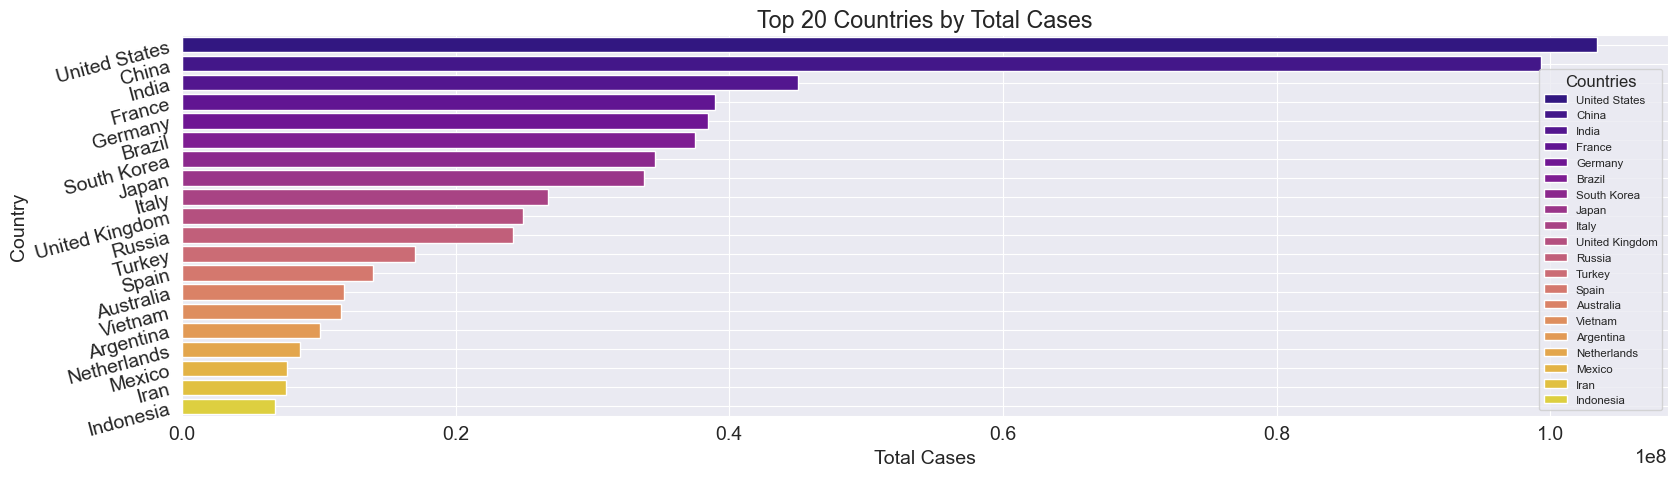

In [257]:
# This creates the plot using total_cases and location.
# you can make the sns.barplot() verticle by changing the x and y variables. seaborn automaticlaly makes it v or h when you do that.
sns.barplot(x='total_cases', y='location', hue='location', data=top20_cases, palette='plasma', legend=True)   #colour maps: viridis, mako, plasma


#FutureWarning: 
#Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.
#sns.barplot(x='total_cases', y='location', data=top20_cases, palette='plasma')   #colour maps: viridis, mako, plasma

# so i added hue='subcategory' and , legend=False         i think legend is automatically false, or it doesnt show but you can put it inside anyways
# hue is different in sns and plt, it is a way to group the ticks/data into subcategories
# so adding a hue will create a grouping that can be used seperately for something else. in this case its needed as you must need to assign a hue when
# passing a palette so this is somehting i added to get rid of the future warning. it will avoid issues wen upgrading to newer versions
# legend shows the mapping of the hue, true false, there not there,

# manipulation of legend    dont really need a legend but why not
plt.legend(fontsize=8.3, title='Countries', title_fontsize=12, loc='lower right')   
#changing the fontsize will change the box overall or the legend will automatically scale to the font

plt.title('Top 20 Countries by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
#plt.xticks(rotation=270)    this will rotate the value labels (ticks) ticks function will manipulate the ticks
#           rotation=45, fontsize=12, color='red'
# rotations start from the default then anti clockwise. able to use negatives as well
plt.yticks(rotation=15)
plt.grid(True)      #True false, grid, no grid, default is lines from each xtick
plt.tight_layout()    #??? barely smaller this is useless

#remember how we set the default plot settings first above
plt.show()

In [258]:
# NOW THAT IVE SEEN IT ONCE, ILL TRY CODE IT MYSELF SOMEWHAT

# MAKING A DATAFRAME FOR NEW GRAPH
top20_cpm = sn.sort_values('total_cases_per_million', ascending=False).head(20)
top20_capm = top20_cpm[['location', 'total_cases_per_million']].reset_index().drop('index', axis=1)

print(top20_capm.head(5))


      location  total_cases_per_million
0       Cyprus               771480.580
1       Brunei               768584.550
2   San Marino               750727.219
3      Austria               680382.168
4  South Korea               667207.062


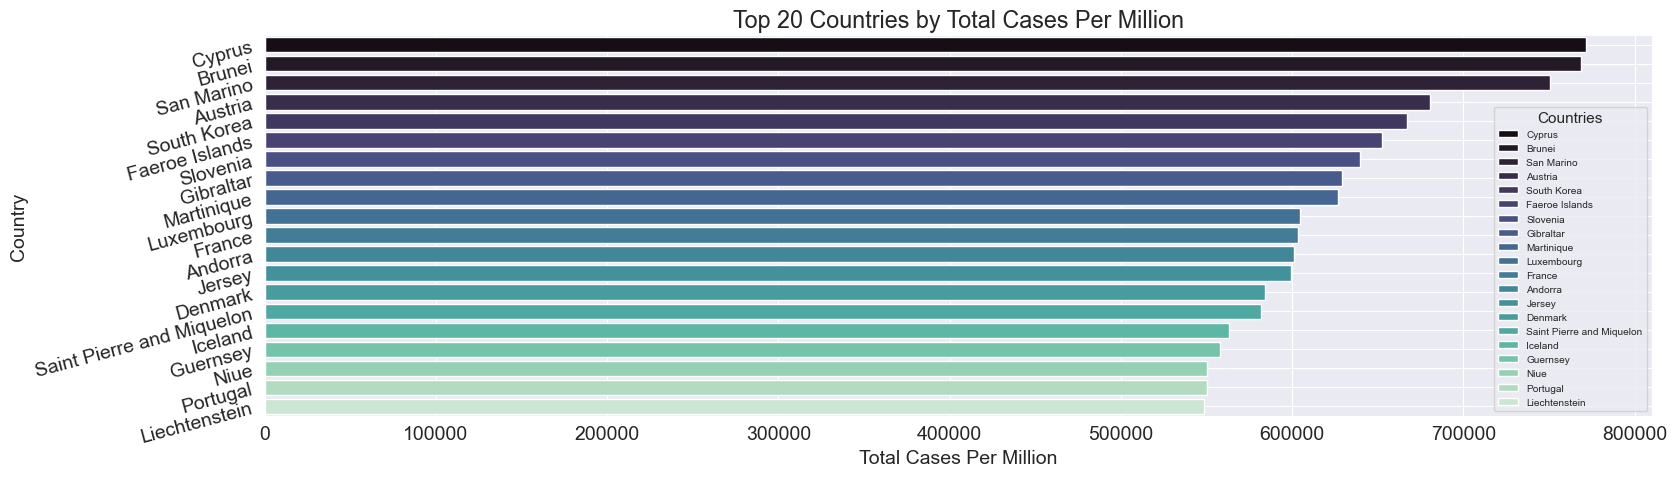

In [244]:
# MAKING THE GRAPH. Copy pasting the last stuff
sns.barplot(x='total_cases_per_million', y='location', hue='location', data=top20_capm, palette='mako', legend=True) #colour maps: viridis, mako, plasma
plt.legend(fontsize=7.25, title='Countries', title_fontsize=11, loc='lower right')  
plt.title('Top 20 Countries by Total Cases Per Million')
plt.xlabel('Total Cases Per Million')
plt.ylabel('Country')
plt.yticks(rotation=15)
plt.grid(True)    
plt.tight_layout()  
plt.show()

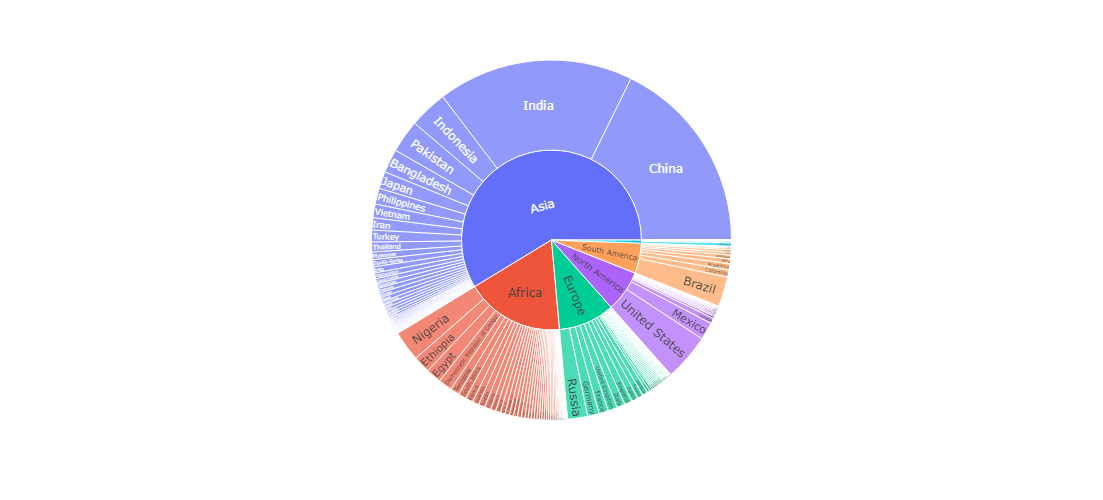

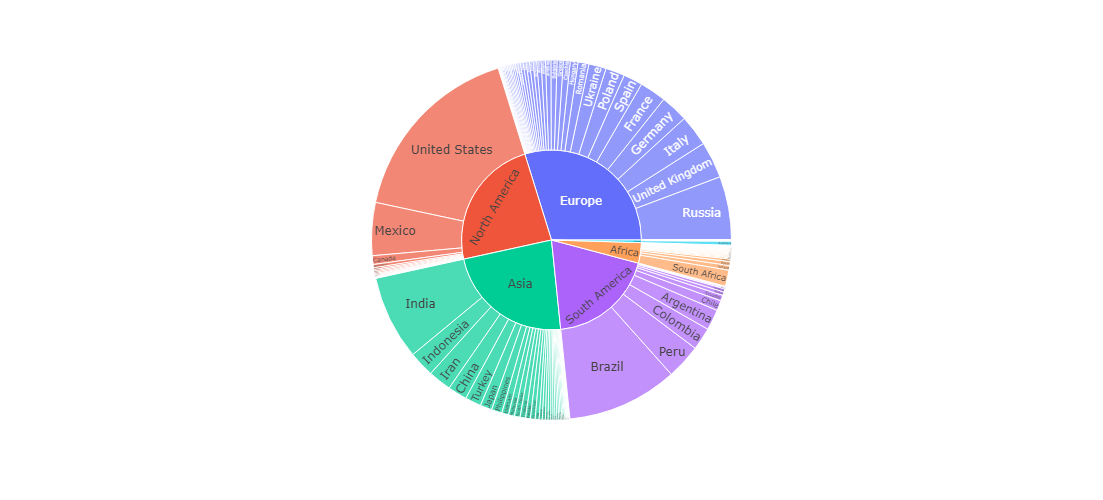

In [289]:
# SO THE REST IS JUST PLOTTING WHATEVER GRAPHS. IM GOING TO CHOoSE THE SUNBURST CHART CUS IT LOOKS COOL
# THIS WILL BE ONE WITH TOTAL DEATHS RATHER THAN TOTAL CASES (the one that was actually used)   i could do population as well
# first I will do one for population
# second I will do one ofor total deaths

figu = px.sunburst(sn, path=['continent', 'location'], values='population')  # (dataframe, path determines the hierarchy, values what to use)
figu.update_layout(width=500, height=500)
figu.show()

fig = px.sunburst(sn, path=['continent', 'location'], values='total_deaths') 
fig.update_layout(width=500, height=500)
fig.show()
